In [1]:
import pandas as pd
from annotation_data_model import AnnotationSample

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


### Sentence level (Independent from article level)
- Conclusion: 
    - mfd2 seems better in dictionary based methods. DDR is slightly better than mfd2
    - Vice percentage is low 0.8 quantile = 0; 0.9 quantile = 1

In [2]:
# Collect results from the methods.
methods = ['mfd', 'mfd2', 'emfd', 'ddr']
moral_foundations = ['care', 'fairness', 'authority', 'loyalty', 'sanctity']

final_result_dict_t5 = dict()
final_result_dict_t10 = dict()
final_result_dict_t20 = dict()
for method in methods:
    final_result_dict_t5[method] = {mf: None for mf in moral_foundations}
    final_result_dict_t10[method] = {mf: None for mf in moral_foundations}
    final_result_dict_t20[method] = {mf: None for mf in moral_foundations}

##### Count based

In [3]:
# file_path = './data/annotaion_sample.xlsx'
file_path = './data/annotaion_sample_v1 copy.xlsx'
article_number = 10

mfd_vers = {
    'mfd': None, 
    'mfd2': None, 
    'emfd': None
}

for mfd_ver in mfd_vers.keys():
    sample = AnnotationSample(file_path, article_number)
    sample.compute_mfd_count(mfd_ver)

    df_list = []
    for i in range(len(sample.excel_sheets)):
        df = sample.excel_sheets[i]
        df_list.append(df)
        df[f'{mfd_ver}_match_len'] = df[f'{mfd_ver}_match'].apply(lambda x: len(x) if x is not None else 0)
    
    mfd_vers[mfd_ver] = pd.concat(df_list)
    mfd_vers[mfd_ver] = mfd_vers[mfd_ver].reset_index(drop=True)

In [8]:
# Detail annotation result
mfd_ver = 'mfd'
df_mfd = mfd_vers[mfd_ver]
df_mfd.sum()

# df_agg = df_mfd.groupby(f'{mfd_ver}_match_len').count()[['MF Relevance']]
# df_agg = df_agg.rename(columns={'MF Relevance': 'count_all'})
# df_agg['count_relevant'] = df_mfd.groupby(f'{mfd_ver}_match_len').sum()[['MF Relevance']]
# df_agg['percentage'] = df_agg['count_relevant'] / df_agg['count_all']
# print(df_agg)
# df_agg.plot(y='percentage', use_index=True)

# moral_foundations = ['care', 'fairness', 'authority', 'loyalty', 'sanctity']
# for mf in moral_foundations:
#     recall_t5 = df_mfd.sort_values(by=mf).tail(5)['MF Relevance'].sum()/5
#     recall_t10 = df_mfd.sort_values(by=mf).tail(10)['MF Relevance'].sum()/10
#     recall_t20 = df_mfd.sort_values(by=mf).tail(20)['MF Relevance'].sum()/20
#     final_result_dict_t5[mfd_ver][mf] = recall_t5
#     final_result_dict_t10[mfd_ver][mf] = recall_t10
#     final_result_dict_t20[mfd_ver][mf] = recall_t20
#     print(f'{mf} precision:', recall_t10)

paragraphs                   REPORTER: Donning his Yes hoodie, the Prime Mi...
MF Relevance                                                               128
YES/NO Argument Relevance                                                   33
care+                                                                      8.0
care-                                                                     17.0
fairness+                                                                  6.0
fairness-                                                                 24.0
authority+                                                                 9.0
authority-                                                                22.0
loyalty+                                                                  30.0
loyalty-                                                                   6.0
sanctity+                                                                  4.0
sanctity-                                           

In [4]:
# Vice count percentage
df_tmp = mfd_vers['mfd']
df_tmp['vice percentage'] = df_tmp['vice_count']/df_tmp['mfd_match_len']
# df_tmp[df_tmp['mfd_match_len']!=0][['vice percentage']].quantile(0.8)
df_tmp[df_tmp['mfd_match_len']!=0].groupby('vice percentage').count()

,paragraphs,MF Relevance,YES/NO Argument Relevance,care+,care-,fairness+,fairness-,authority+,authority-,loyalty+,...,mfd_count_info,mfd_count,care,fairness,authority,loyalty,sanctity,vice_count,mfd_match,mfd_match_len
vice percentage,,,,,,,,,,,,,,,,,,,,,
0.000000,102,102,102,102,102,102,102,102,102,102,...,102,102,102,102,102,102,102,102,102,102
0.333333,4,4,4,4,4,4,4,4,4,4,...,4,4,4,4,4,4,4,4,4,4
0.500000,4,4,4,4,4,4,4,4,4,4,...,4,4,4,4,4,4,4,4,4,4
0.666667,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
1.000000,12,12,12,12,12,12,12,12,12,12,...,12,12,12,12,12,12,12,12,12,12
2.000000,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2


               count_all  count_relevant  percentage
mfd_match_len                                       
0                    214              67    0.313084
1                     85              43    0.505882
2                     25               9    0.360000
3                     12               7    0.583333
4                      2               1    0.500000
6                      1               1    1.000000
care precision: 0.6
fairness precision: 0.8
authority precision: 0.5
loyalty precision: 0.3
sanctity precision: 0.1


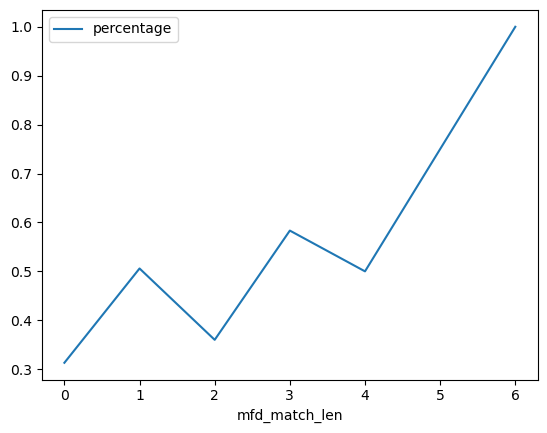

In [5]:
mfd_ver = 'mfd'
df_mfd = mfd_vers[mfd_ver]
df_agg = df_mfd.groupby(f'{mfd_ver}_match_len').count()[['MF Relevance']]
df_agg = df_agg.rename(columns={'MF Relevance': 'count_all'})
df_agg['count_relevant'] = df_mfd.groupby(f'{mfd_ver}_match_len').sum()[['MF Relevance']]
df_agg['percentage'] = df_agg['count_relevant'] / df_agg['count_all']
print(df_agg)
df_agg.plot(y='percentage', use_index=True)

moral_foundations = ['care', 'fairness', 'authority', 'loyalty', 'sanctity']
for mf in moral_foundations:
    recall_t5 = df_mfd.sort_values(by=mf).tail(5)['MF Relevance'].sum()/5
    recall_t10 = df_mfd.sort_values(by=mf).tail(10)['MF Relevance'].sum()/10
    recall_t20 = df_mfd.sort_values(by=mf).tail(20)['MF Relevance'].sum()/20
    final_result_dict_t5[mfd_ver][mf] = recall_t5
    final_result_dict_t10[mfd_ver][mf] = recall_t10
    final_result_dict_t20[mfd_ver][mf] = recall_t20
    print(f'{mf} precision:', recall_t10)

                count_all  count_relevant  percentage
mfd2_match_len                                       
0                     190              51    0.268421
1                      89              38    0.426966
2                      43              26    0.604651
3                      11               8    0.727273
4                       3               2    0.666667
5                       3               3    1.000000
care precision: 0.7
fairness precision: 0.6
authority precision: 0.6
loyalty precision: 0.7
sanctity precision: 0.3


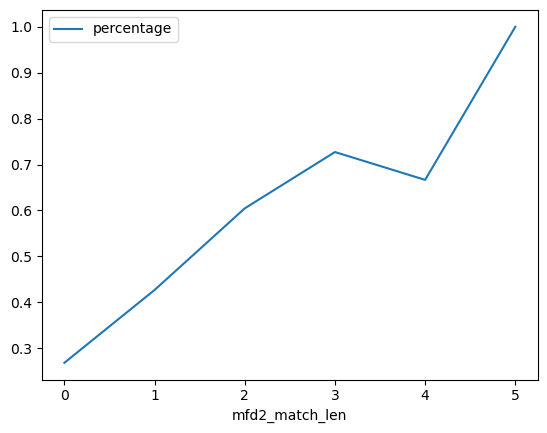

In [18]:
mfd_ver = 'mfd2'
df_mfd = mfd_vers[mfd_ver]
df_agg = df_mfd.groupby(f'{mfd_ver}_match_len').count()[['MF Relevance']]
df_agg = df_agg.rename(columns={'MF Relevance': 'count_all'})
df_agg['count_relevant'] = df_mfd.groupby(f'{mfd_ver}_match_len').sum()[['MF Relevance']]
df_agg['percentage'] = df_agg['count_relevant'] / df_agg['count_all']
print(df_agg)
df_agg.plot(y='percentage', use_index=True)
moral_foundations = ['care', 'fairness', 'authority', 'loyalty', 'sanctity']
for mf in moral_foundations:
    recall_t5 = df_mfd.sort_values(by=mf).tail(5)['MF Relevance'].sum()/5
    recall_t10 = df_mfd.sort_values(by=mf).tail(10)['MF Relevance'].sum()/10
    recall_t20 = df_mfd.sort_values(by=mf).tail(20)['MF Relevance'].sum()/20
    final_result_dict_t5[mfd_ver][mf] = recall_t5
    final_result_dict_t10[mfd_ver][mf] = recall_t10
    final_result_dict_t20[mfd_ver][mf] = recall_t20
    print(f'{mf} precision:', recall_t10)

care precision: 0.4
fairness precision: 0.3
authority precision: 0.3
loyalty precision: 0.3
sanctity precision: 0.4


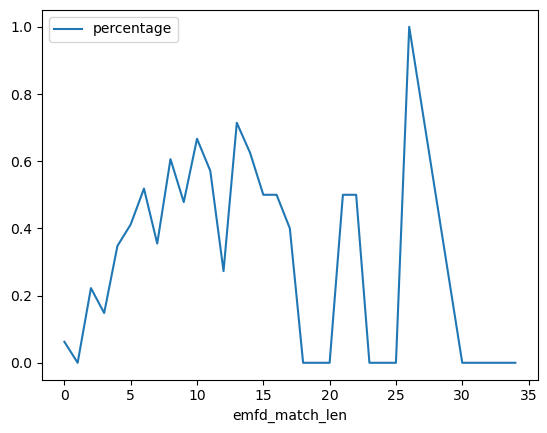

In [17]:
mfd_ver = 'emfd'
df_mfd = mfd_vers[mfd_ver]
df_agg = df_mfd.groupby(f'{mfd_ver}_match_len').count()[['MF Relevance']]
df_agg = df_agg.rename(columns={'MF Relevance': 'count_all'})
df_agg['count_relevant'] = df_mfd.groupby(f'{mfd_ver}_match_len').sum()[['MF Relevance']]
df_agg['percentage'] = df_agg['count_relevant'] / df_agg['count_all']
# print(df_agg)
df_agg.plot(y='percentage', use_index=True)
moral_foundations = ['care', 'fairness', 'authority', 'loyalty', 'sanctity']
for mf in moral_foundations:
    recall_t5 = df_mfd.sort_values(by=mf).tail(5)['MF Relevance'].sum()/5
    recall_t10 = df_mfd.sort_values(by=mf).tail(10)['MF Relevance'].sum()/10
    recall_t20 = df_mfd.sort_values(by=mf).tail(20)['MF Relevance'].sum()/20
    final_result_dict_t5[mfd_ver][mf] = recall_t5
    final_result_dict_t10[mfd_ver][mf] = recall_t10
    final_result_dict_t20[mfd_ver][mf] = recall_t20
    print(f'{mf} precision:', recall_t10)

In [11]:
mfd_ver = 'mfd2'
df_mfd = mfd_vers[mfd_ver]
num_relevance = df_mfd['MF Relevance'].sum()
total_num = len(df_mfd)

print('num_relevance', num_relevance)
print('total_num', total_num )
print('Percentage', num_relevance/total_num)

num_relevance 128
total_num 339
Percentage 0.3775811209439528


##### DDR

In [4]:
file_path = './data/annotaion_sample.xlsx'
article_number = 10

sample = AnnotationSample(file_path, article_number)
sample.compute_cosine()

df_list = []
for i in range(len(sample.excel_sheets)):
    df = sample.excel_sheets[i]
    df_list.append(df)

df_ddr = pd.concat(df_list)

In [16]:
moral_foundations = ['care', 'fairness', 'authority', 'loyalty', 'sanctity']
# for mf in moral_foundations:
#     print(f'{mf} precision:', df_ddr.sort_values(by=mf).tail(10)['MF Relevance'].sum()/10)

method = 'ddr'
for mf in moral_foundations:
    recall_t5 = df_ddr.sort_values(by=mf).tail(5)['MF Relevance'].sum()/5
    recall_t10 = df_ddr.sort_values(by=mf).tail(10)['MF Relevance'].sum()/10
    recall_t20 = df_ddr.sort_values(by=mf).tail(20)['MF Relevance'].sum()/20
    final_result_dict_t5[method][mf] = recall_t5
    final_result_dict_t10[method][mf] = recall_t10
    final_result_dict_t20[method][mf] = recall_t20
    print(f'{mf} precision:', recall_t10)

care precision: 0.6
fairness precision: 0.8
authority precision: 0.5
loyalty precision: 0.9
sanctity precision: 0.7


##### Final comparison

In [20]:
print('Avg recall with top 5:\n', pd.DataFrame(final_result_dict_t5).mean())
pd.DataFrame(final_result_dict_t5)

Avg recall with top 5:
 mfd     0.44
mfd2    0.76
emfd    0.36
ddr     0.72
dtype: float64


,mfd,mfd2,emfd,ddr
care,0.6,0.6,0.4,0.6
fairness,0.8,0.8,0.2,1.0
authority,0.6,0.8,0.2,0.4
loyalty,0.2,1.0,0.4,1.0
sanctity,0.0,0.6,0.6,0.6


In [21]:
print('Avg recall with top 10:\n', pd.DataFrame(final_result_dict_t10).mean())
pd.DataFrame(final_result_dict_t10)

Avg recall with top 10:
 mfd     0.46
mfd2    0.58
emfd    0.34
ddr     0.70
dtype: float64


,mfd,mfd2,emfd,ddr
care,0.6,0.7,0.4,0.6
fairness,0.8,0.6,0.3,0.8
authority,0.5,0.6,0.3,0.5
loyalty,0.3,0.7,0.3,0.9
sanctity,0.1,0.3,0.4,0.7


In [22]:
print('Avg recall with top 20:\n', pd.DataFrame(final_result_dict_t20).mean())
pd.DataFrame(final_result_dict_t20)

Avg recall with top 20:
 mfd     0.43
mfd2    0.58
emfd    0.43
ddr     0.66
dtype: float64


,mfd,mfd2,emfd,ddr
care,0.70,0.7,0.55,0.55
fairness,0.50,0.5,0.40,0.70
authority,0.55,0.7,0.35,0.50
loyalty,0.30,0.7,0.40,0.80
sanctity,0.10,0.3,0.45,0.75


### Article level

In [3]:
file_path = './data/annotaion_sample.xlsx'
article_number = 10

mfd_vers = {
    'mfd': {'count_mf_relevance': [], 'count_mf_match': [], 'unit_num': []}, 
    'mfd2': {'count_mf_relevance': [], 'count_mf_match': [], 'unit_num': []}, 
    'emfd': {'count_mf_relevance': [], 'count_mf_match': [], 'unit_num': []}
}

for mfd_ver, info_dict in mfd_vers.items():
    sample = AnnotationSample(file_path, article_number)
    sample.compute_mfd_count(mfd_ver)

    for i in range(len(sample.excel_sheets)):
        df = sample.excel_sheets[i]

        mfd_vers[mfd_ver]['count_mf_relevance'].append(df['MF Relevance'].sum())
        mfd_vers[mfd_ver]['count_mf_match'].append(df[f'{mfd_ver}_count'].sum())
        mfd_vers[mfd_ver]['unit_num'].append(len(df))

    mfd_vers[mfd_ver] = pd.DataFrame(mfd_vers[mfd_ver])

In [4]:
mfd_vers['emfd'] 

,count_mf_relevance,count_mf_match,unit_num
0,33,613,89
1,10,121,16
2,2,235,13
3,20,446,82
4,9,112,23
5,10,141,17
6,13,323,29
7,2,38,7
8,22,222,33
9,7,113,30


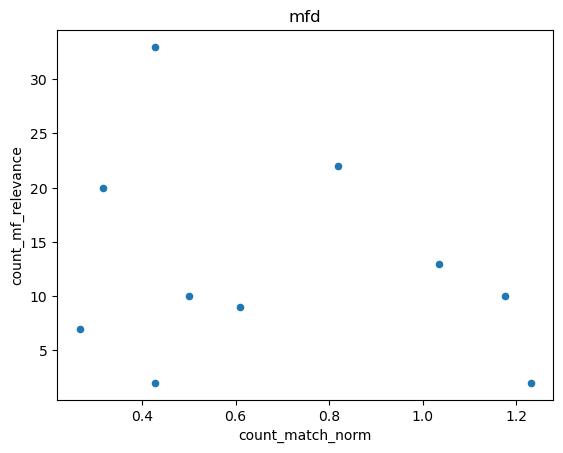

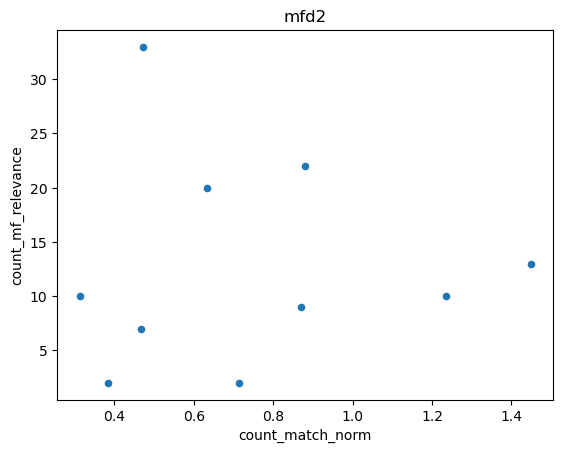

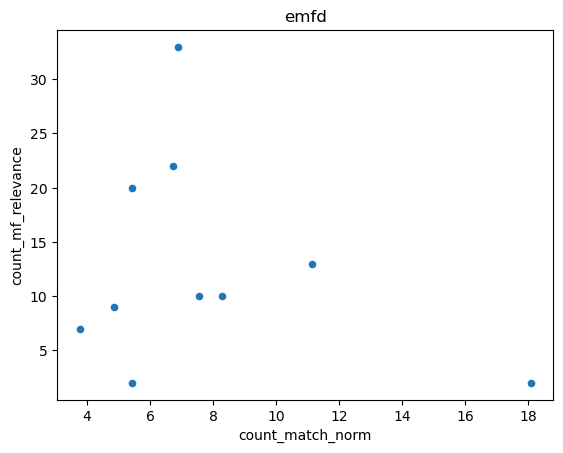

In [5]:
for mfd_ver, df in mfd_vers.items():
    mfd_vers[mfd_ver]['count_match_norm'] = df['count_mf_match'] / df['unit_num']
    mfd_vers[mfd_ver].plot.scatter(y='count_mf_relevance', x='count_match_norm', title=mfd_ver)

# `count_mf_relevance` is the total number of mf relevant label in an article.
# `count_match_norm` is the total number of words in an article matching with mfd, 
#  normalised by the number of unit.